<a href="https://colab.research.google.com/github/gaurav1210/LAB-EXPERIMENT/blob/main/X_RAY_LAB_WORK_SCINTILLATION_DETECTOR_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **LAB: SCINTILATION DETECTOR ANALYSIS**

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


NameError: name 'chanhnel_no_sorted' is not defined

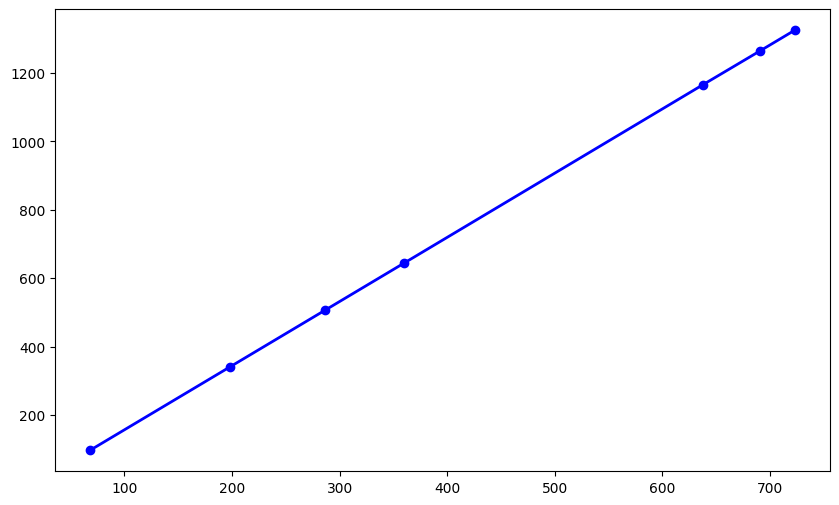

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
from scipy.optimize import curve_fit
# Data
elements = ["Co57", "Ba133", "Co60", "Co60", "Na22", "Na22", "Cs137"]
peak_energy = [97.43, 340.93, 1165.7, 1324.28, 505.76, 1264.34, 644.36]  # in keV
channel_no = [68, 198, 638, 723, 286, 691, 360]

# Sort data by Channel Number for a better line plot
sorted_data = sorted(zip(channel_no, peak_energy, elements))
channel_no_sorted, peak_energy_sorted, elements_sorted = zip(*sorted_data)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(channel_no_sorted, peak_energy_sorted, marker='o', color='b', linestyle='-', linewidth=2, markersize=6)

# Add labels for each point
for i, element in enumerate(elements_sorted):
    plt.text(chanhnel_no_sorted[i], peak_energy_sorted[i] + 20, element, fontsize=10, ha='center')

# Plot settings
plt.title("Channel Number vs. Peak Energy for Different Source Elements")
plt.xlabel("Channel Number")
plt.ylabel("Peak Energy (keV)")
plt.grid(True)
plt.show()

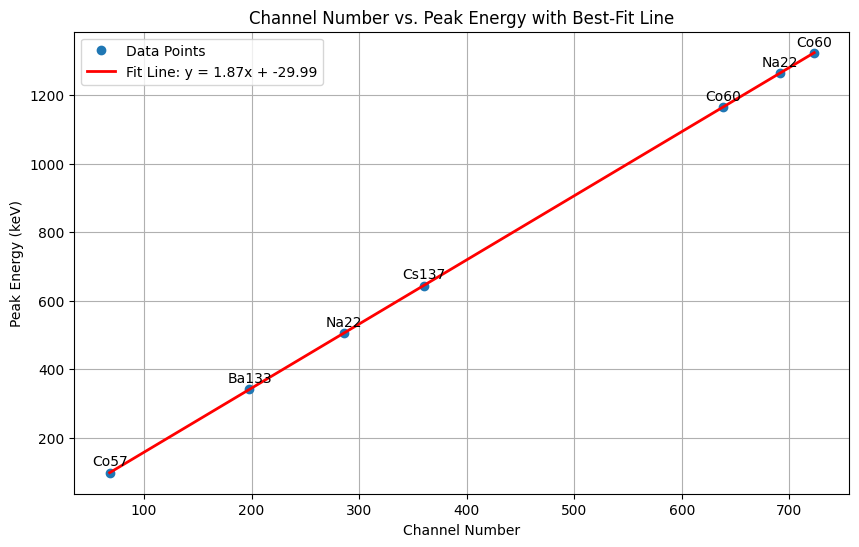

Equation of the best-fit line: Peak Energy = 1.87 * Channel Number + -29.99
R-squared value: 1.0000


In [7]:
# Data
elements = ["Co57", "Ba133", "Co60", "Co60", "Na22", "Na22", "Cs137"]
peak_energy = [97.43, 340.93, 1165.7, 1324.28, 505.76, 1264.34, 644.36]  # in keV
channel_no = [68, 198, 638, 723, 286, 691, 360]

# Sort data by Channel Number for a better line plot
sorted_data = sorted(zip(channel_no, peak_energy, elements))
channel_no_sorted, peak_energy_sorted, elements_sorted = zip(*sorted_data)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(channel_no_sorted, peak_energy_sorted)

# Calculate the fitted values
fitted_values = [slope * x + intercept for x in channel_no_sorted]

# Plot the data and the best-fit line
plt.figure(figsize=(10, 6))
plt.plot(channel_no_sorted, peak_energy_sorted, 'o', label='Data Points', markersize=6)
plt.plot(channel_no_sorted, fitted_values, 'r-', label=f'Fit Line: y = {slope:.2f}x + {intercept:.2f}', linewidth=2)

# Add labels for each point
for i, element in enumerate(elements_sorted):
    plt.text(channel_no_sorted[i], peak_energy_sorted[i] + 20, element, fontsize=10, ha='center')

# Plot settings
plt.title("Channel Number vs. Peak Energy with Best-Fit Line")
plt.xlabel("Channel Number")
plt.ylabel("Peak Energy (keV)")
plt.legend()
plt.grid(True)
plt.show()

# Print the equation and R-squared value
print(f"Equation of the best-fit line: Peak Energy = {slope:.2f} * Channel Number + {intercept:.2f}")
print(f"R-squared value: {r_value**2:.4f}")


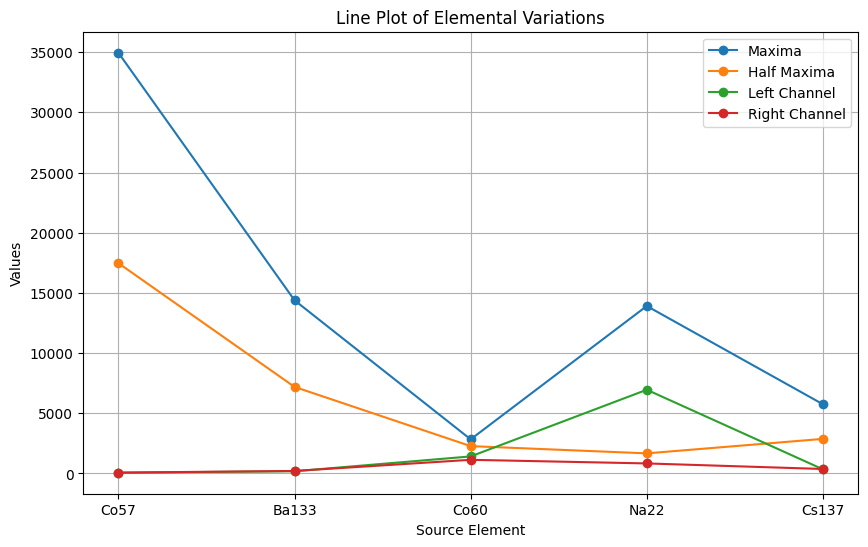

The fitted equation between Maxima and Half Maxima is: y = 4.88e-01 * x + -716.22


In [8]:
# Creating the dataset based on the provided data
data = {
    "Source Element": ["Co57", "Ba133", "Co60", "Na22", "Cs137"],
    "Maxima": [34957, 14390, 2837, 13914, 5751],
    "Half Maxima": [17478, 7195, 2274, 1672, 2875],
    "Left Channel": [64, 187, 1418, 6957, 346],
    "Right Channel": [74, 210, 1137, 836, 374]
}
df = pd.DataFrame(data)

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns[1:]:
    plt.plot(df["Source Element"], df[column], label=column, marker='o')

plt.title("Line Plot of Elemental Variations")
plt.xlabel("Source Element")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.show()

# Fitting a linear function between Maxima and Half Maxima
x_data = df["Maxima"]
y_data = df["Half Maxima"]

# Define a linear function for the fit
def linear_func(x, a, b):
    return a * x + b

# Curve fitting
params, covariance = curve_fit(linear_func, x_data, y_data)
a, b = params  # Parameters for the linear function

# Displaying the resulting equation
print(f"The fitted equation between Maxima and Half Maxima is: y = {a:.2e} * x + {b:.2f}")


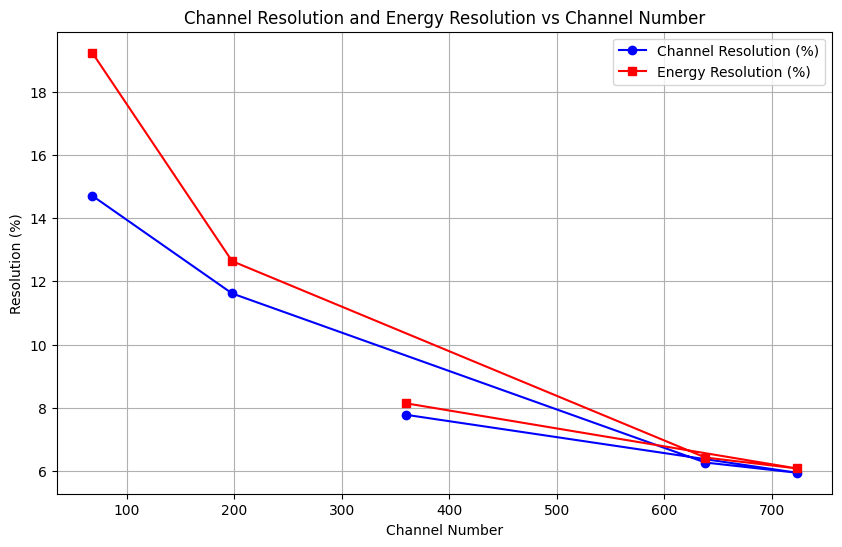

Channel Resolution (%) = -0.0128 * x + 14.3407
Energy Resolution (%) = -0.0180 * x + 17.6399


In [9]:
# Define the data
data = {
    "Counts": [34957, 14390, 2837, 2279, 5751],
    "Channel No.": [68, 198, 638, 723, 360],
    "Peak Energy (Kev)": [97.93, 340.93, 1165.7, 1324.28, 644.36],
    "FWHM (Channels)": [10, 23, 40, 93, 28],
    "FWHM (Kev)": [18.2278, 43.0874, 74.9346, 80.5598, 52.4542],
    "Energy Resolution (%)": [19.2278, 12.6382, 6.4283, 6.0829, 8.1405],
    "Channel Resolution (%)": [14.7058, 11.6161, 6.2695, 5.9474, 7.7777]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plot Channel and Energy Resolutions
plt.figure(figsize=(10, 6))
plt.plot(df["Channel No."], df["Channel Resolution (%)"], 'bo-', label="Channel Resolution (%)")
plt.plot(df["Channel No."], df["Energy Resolution (%)"], 'rs-', label="Energy Resolution (%)")
plt.xlabel("Channel Number")
plt.ylabel("Resolution (%)")
plt.title("Channel Resolution and Energy Resolution vs Channel Number")
plt.legend()
plt.grid(True)
plt.show()

# Define a linear function to fit the data
def linear_func(x, a, b):
    return a * x + b

# Fit Channel Resolution (%)
params_channel, _ = curve_fit(linear_func, df["Channel No."], df["Channel Resolution (%)"])
a_channel, b_channel = params_channel

# Fit Energy Resolution (%)
params_energy, _ = curve_fit(linear_func, df["Channel No."], df["Energy Resolution (%)"])
a_energy, b_energy = params_energy

# Print the fitted equations
print(f"Channel Resolution (%) = {a_channel:.4f} * x + {b_channel:.4f}")
print(f"Energy Resolution (%) = {a_energy:.4f} * x + {b_energy:.4f}")


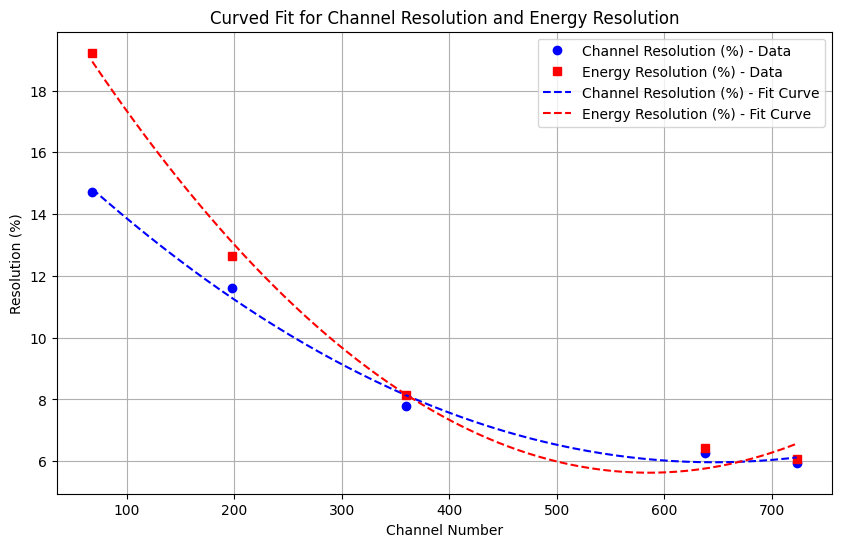

Channel Resolution (%) = 0.0000 * x^2 + -0.0342 * x + 17.0220
Energy Resolution (%) = 0.0000 * x^2 + -0.0582 * x + 22.6747


In [10]:
# Define the data
data = {
    "Counts": [34957, 14390, 2837, 2279, 5751],
    "Channel No.": [68, 198, 638, 723, 360],
    "Peak Energy (Kev)": [97.93, 340.93, 1165.7, 1324.28, 644.36],
    "FWHM (Channels)": [10, 23, 40, 93, 28],
    "FWHM (Kev)": [18.2278, 43.0874, 74.9346, 80.5598, 52.4542],
    "Energy Resolution (%)": [19.2278, 12.6382, 6.4283, 6.0829, 8.1405],
    "Channel Resolution (%)": [14.7058, 11.6161, 6.2695, 5.9474, 7.7777]
}

# Create DataFrame
df = pd.DataFrame(data)

# Fit a 2nd-degree polynomial (quadratic) for Channel Resolution and Energy Resolution
channel_poly_coeff = np.polyfit(df["Channel No."], df["Channel Resolution (%)"], 2)
energy_poly_coeff = np.polyfit(df["Channel No."], df["Energy Resolution (%)"], 2)

# Generate polynomial functions based on the fitted coefficients
channel_poly = np.poly1d(channel_poly_coeff)
energy_poly = np.poly1d(energy_poly_coeff)

# Generate smooth x values for plotting
x_smooth = np.linspace(df["Channel No."].min(), df["Channel No."].max(), 200)

# Calculate y values using the polynomial functions
channel_res_smooth = channel_poly(x_smooth)
energy_res_smooth = energy_poly(x_smooth)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(df["Channel No."], df["Channel Resolution (%)"], 'bo', label="Channel Resolution (%) - Data")
plt.plot(df["Channel No."], df["Energy Resolution (%)"], 'rs', label="Energy Resolution (%) - Data")
plt.plot(x_smooth, channel_res_smooth, 'b--', label="Channel Resolution (%) - Fit Curve")
plt.plot(x_smooth, energy_res_smooth, 'r--', label="Energy Resolution (%) - Fit Curve")

# Labeling
plt.xlabel("Channel Number")
plt.ylabel("Resolution (%)")
plt.title("Curved Fit for Channel Resolution and Energy Resolution")
plt.legend()
plt.grid(True)
plt.show()
# Display the polynomial equations for both Channel Resolution and Energy Resolution
channel_eqn_str = f"Channel Resolution (%) = {channel_poly_coeff[0]:.4f} * x^2 + {channel_poly_coeff[1]:.4f} * x + {channel_poly_coeff[2]:.4f}"
energy_eqn_str = f"Energy Resolution (%) = {energy_poly_coeff[0]:.4f} * x^2 + {energy_poly_coeff[1]:.4f} * x + {energy_poly_coeff[2]:.4f}"

print(channel_eqn_str)
print(energy_eqn_str)



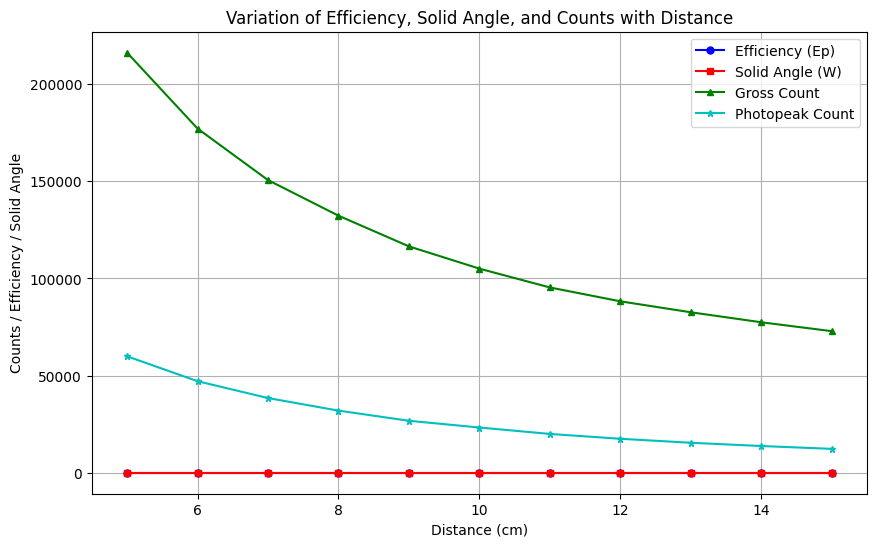

In [11]:
# Data for plotting
distance = [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
gross_count = [216235, 177166, 150649, 132338, 116534, 105070, 95387, 88244, 82606, 77465, 72882]
photopeak_count = [59932, 47117, 38442, 31973, 26733, 23275, 19968, 17478, 15424, 13757, 12283]
efficiency = [0.2772, 0.2660, 0.2552, 0.2416, 0.2294, 0.2215, 0.2093, 0.1981, 0.1867, 0.1775, 0.1685]
solid_angle = [0.0528, 0.0385, 0.0298, 0.0228, 0.0182, 0.0150, 0.0124, 0.0105, 0.0089, 0.0078, 0.0068]

# Plotting Efficiency and Solid Angle
plt.figure(figsize=(10, 6))
plt.plot(distance, efficiency, 'bo-', label="Efficiency (Ep)", markersize=5)
plt.plot(distance, solid_angle, 'rs-', label="Solid Angle (W)", markersize=5)

# Optional: Plot Source Strength (e.g., Gross Count)
plt.plot(distance, gross_count, 'g^-', label="Gross Count", markersize=5)
plt.plot(distance, photopeak_count, 'c*-', label="Photopeak Count", markersize=5)

# Adding Labels and Titles
plt.xlabel("Distance (cm)")
plt.ylabel("Counts / Efficiency / Solid Angle")
plt.title("Variation of Efficiency, Solid Angle, and Counts with Distance")
plt.legend()
plt.grid(True)
plt.show()
